# Insurance Business Modelling and Basic Actuarial Calculations

## Objectives


After completing this lab, you will be able to:


* Build a model of an Insurance Company with Risk Process.
  * Understand the Classical Risk Process.
* Understand basic actuarial approximations and their limitations.
  * Use Actuarial approximations for Risk Assessment of the Classical Risk Process.
* Calculate the Ruin Probability of the Classical Risk Process using Monte Carlo method and compare it to theoretical results.



## Introduction


The performance of an insurance company and other financial institutions should be evaluated in terms of profitability and risk.
In this lab, we consider the average earned capital as a measure of profitability and the company ruin probability (on a fixed time interval) as a measure of risk. 
Evolution of the company's capital can be modelled by a stochastic process, the so-called Risk Process.
Estimating ruin probability of an insurance company is an important practical problem, but it appears a difficult theoretical and computational task. In case of simplified Risk Process (in particular the Classical Risk Process) approximations are used to estimate the ruin probability. In a general case, we can apply Monte Carlo method, i.e. modeling stochastic trajectories of the company's reserves evolution.
In this lab, we'll deal with both the Classical and a Generalized model, and assess profitability and risk.


## Classical Risk Process


The Classical Risk Process describes an insurance company with an initial capital $u$ through incoming cash premiums and outgoing claims. Premiums arrive at a constant rate $c>0$ and claims happen at random time moments and are random values.


<left>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/insurance-risk-assessment-with-montecarlo-method-using-apache-spark/images/RiskProcess.JPG" width="500" alt="Classical Risk Process">
</left>


 ${\xi _t} = u + ct - \sum\nolimits_{k = 1}^{{N_t}} {{z_k}}$ ,


where  ${\xi _t}$ is the capital of the insurance company at the time moment $t$ ;

$u$ is the initial state of the process (the initial capital of the company);

$c$ is the rate of premium income;

$N_t$ is the number of claims that arrived before time $t$;

$\{z_k, 1\leq k\leq N_t\}$ are independent identically distributed random variables (claims) with distribution function $F(\cdot)$ and mean value $\mu=\int_0^\infty zdF(z)$. 

In the classical risk process, the flow of claims is the Poisson process, i.e. $N_t$ is a discrete random variable with Poisson distribution,
$P\{N_t=k\}=\frac{(\lambda t)^k}{k!}e^{-\lambda t}$. 


## CALCULATIONS FOR THE CLASSICAL RISK PROCESS


In the case of the Classical Risk Process, it is possible to calculate different functional of the process analytically.


## The Mean


In the case of the Classical Risk Process, the mean (expected) value ${\rm{E}}{\xi _t} $ at time $ t $  can be found as


${\rm{E}}{\xi _t} = (u + ct - \lambda \mu t) * \varphi (u) = (u + (c - \lambda \mu )t)*\varphi (u)$, where $\varphi (u)$ is the non ruin probability. 


## The Variance


The same for the variance ${\rm{D}}{X_t} $,


${\rm{D}}{X_t} = {\rm{E}}{({X_t} - {\rm{E}}{X_t})^2} = \lambda t{d^2}$ ,

where 

${d^2}{\rm{ = E}}{({z_i})^2} = \int_0^\infty  {{z^2}dF(z)} $.


For example, in the simplest case of exponentially distributed claims, $F(z) = 1 - {e^{ - z/\mu }}$, we have $d = \mu $.

## The Ruin Probability

Calculating (or even estimating) the ruin probability appears to be a more complicated problem.
In the simplest case of the Classical Risk Process with exponentially distributed claim sizes, $F(z) = 1 - {e^{ - z/\mu }}$,  the ruin probability can be found as $\psi (u)  =  {1 \over {1 + \rho }}\exp \left( { - \,\,{{\rho u} \over {\left( {1 + \rho } \right)\mu }}} \right),\,when \,\rho  > 0$ ,

$\psi (u) = 1,\,when \,\rho  \le 0$ ,

where

$\rho  = {{c } \over {\lambda \mu }} - 1$ .

In the case of the Classical Risk Process with arbitrary claim distribution $ F(z) $, the ruin probability cannot be found analytically, but we can find an upper bound $\psi (u) \le {e^{ - Ru}}$, where 
$ R $ is the root of the following equation (the existence is assumed)

${\lambda  \over {c }}\int_0^{ + \infty } {{e^{Ry}}\left( {1 - F(y)} \right)dy}  = 1$.


## NUMERICAL EXPERIMENTS


Now let's simulate different Risk Processes and compare the numerical results with the theoretical ones.


We consider risk process with INITIAL_CAPITAL, with premium arrival at a constant INCOME_INTENSITY rate, claims are independent and identically distributed non-negative random variables (here we consider exponentially distributed claim size with positive CLAIM_MEAN) and arrive according to a Poisson process with INCOME_INTENSITY rate. 


In [2]:
MAXTIME = 10000          # simulation period
INCOME_INTENSITY = 1  # income intensity per time unit
CLAIM_INTENSITY = 1   # time between claims is exponentially distributed 
CLAIM_MEAN = 0.8        # claims are exponentially distributed with CLAIM MEAN, should be >0
TRAJEC_NUM = 100     # number of trajectories simulated

## THEORETICAL CALCULATIONS


Let's define riskprocess_theo(seed_capital) function of the seed (initial) capital that will return [RuinProbability, MeanValue] values for an infinite time interval.


In [3]:
from math import exp #Importing exp function
def riskprocess_theo(seed_capital): 
  Ro=(INCOME_INTENSITY)/(CLAIM_INTENSITY*CLAIM_MEAN)-1
  if (Ro>0):
    RuinProb_Theo=exp(-Ro*seed_capital/((Ro+1)*CLAIM_INTENSITY))/(Ro+1) #Calculating Ruin Probability on infinite time interval
  else:RuinProb_Theo=1
  Mean_Theo=(1-RuinProb_Theo)*(seed_capital+(INCOME_INTENSITY-CLAIM_INTENSITY*CLAIM_MEAN)*MAXTIME) #Calculating Mean
  return [RuinProb_Theo,Mean_Theo] 

## MONTE CARLO SIMULATION


Now let's simulate the same Risk Process using Monte Carlo method. 

In [4]:
import random
import time
from operator import add
def riskprocess(seed_capital): 
    RuinProb_MC = 0
    Mean_MC = 0
    i=0
    for i in range(TRAJEC_NUM):
        time = 0
        capital=seed_capital
        while (time < MAXTIME)and(capital>=0):
            time_step=random.expovariate(CLAIM_INTENSITY)
            time+=time_step
            capital += INCOME_INTENSITY * time_step - random.expovariate(1/CLAIM_MEAN)
            if (capital<0): #in case of ruin
                RuinProb_MC+=1/TRAJEC_NUM 
            else:
                Mean_MC+=capital/TRAJEC_NUM # we add obtained capital if we do not ruin
    return [RuinProb_MC,Mean_MC]

Now we can test our functions.


In [5]:
[RuinProbMC,MeanMC]=riskprocess(10)
print(" Results for MonteCarlo. Mean capital earned =",MeanMC,"Ruin Probability =", RuinProbMC)

 Results for MonteCarlo. Mean capital earned = 9361805.32210264 Ruin Probability = 0.07


In [6]:
[RuinProb_Theo,Mean_Theo]=riskprocess_theo(10)
print("Theoretical resuts Mean Value =",Mean_Theo,"Ruin Probability (infinite time) =",RuinProb_Theo)

Theoretical resuts Mean Value = 1792.3808645555264 Ruin Probability (infinite time) = 0.10826822658929017


Now let's build the plot of Ruin Probability as a function of an initial capital. To do this, we have to generate an array of seed capital values and apply our function.


In [7]:
import numpy as np
SeedCapitalarray = np.arange(0, 20, 2).tolist() # Generating Seed Capital array
[RuinProbMCarray,MeanMCarray]=np.array([riskprocess(u) for u in SeedCapitalarray]).transpose() # Starting Monte Carlo simulation for each Seed Capital value
[RuinProbTheoarray,MeanTheoarray]=np.array([riskprocess_theo(u) for u in SeedCapitalarray]).transpose() # Applying theoretical fourmulas for each Seed Capital value

Now lets plot theoretical vs simulation results.


In [8]:
import matplotlib.pyplot as plt

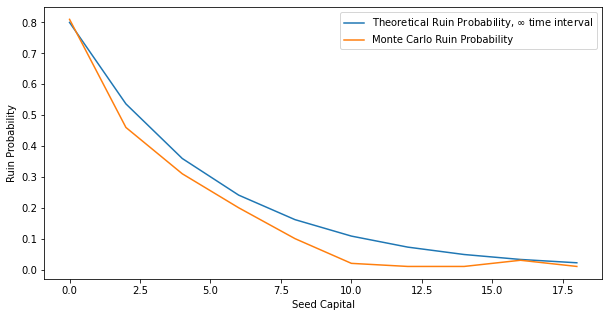

In [10]:
fig, ax = plt.subplots()
ax.plot(SeedCapitalarray, RuinProbTheoarray, label = 'Theoretical Ruin Probability, $\infty $ time interval')
ax.plot(SeedCapitalarray, RuinProbMCarray, label = 'Monte Carlo Ruin Probability')
ax.set_ylabel('Ruin Probability')
ax.set_xlabel('Seed Capital')
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

Note, that theoretical Ruin Probability is calculated for an infinite time interval so it can be considered as an upper bound. Also the accuracy depends on the number of the trajectories (TRAJEC_NUM) of Monte Carlo method.


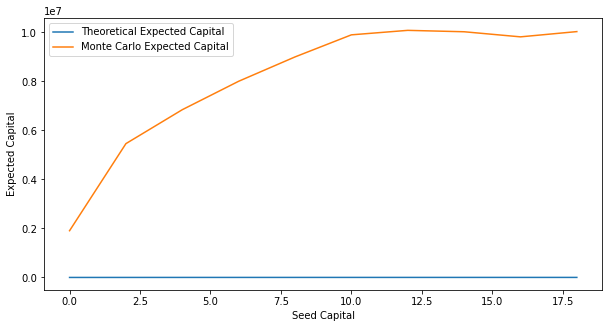

In [11]:
fig, ax = plt.subplots()
ax.plot(SeedCapitalarray, MeanTheoarray, label = 'Theoretical Expected Capital')
ax.plot(SeedCapitalarray, MeanMCarray, label = 'Monte Carlo Expected Capital')
ax.set_ylabel('Expected Capital')
ax.set_xlabel('Seed Capital')
ax.legend()
fig.set_figheight(5)
fig.set_figwidth(10)
plt.show()

You can increase TRAJEC_NUM to get more accurate results.
